In [ ]:
# Dan Scholnick
# 1/6/2020
# Differentiate between Trump and Biden Tweets?

In [ ]:
import os
import io 
import sys
import tweepy as tw
import pandas as pd
import numpy as np
import csv

In [ ]:
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

#Authrorize via Oauth
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [ ]:
#search for Trump tweets
userID = "realDonaldTrump"
date_since = "2020-12-20" #current date was 1/6/2020

tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=175,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

#check that the tweets were loaded
Tr_list = []
for tweet in tweets:
    Tr_list.append([ tweet.full_text.encode("utf-8").decode("utf-8")] 
    )
#check length
len(Tr_list)

119

In [ ]:
######Save this JSON to a CSV file. 
#write to a new csv file from the collection of tweets

outfile = "Tr_tweets.csv"
print ("writing to " + outfile)
with open(outfile, 'w+') as file:
     writer = csv.writer(file, delimiter=',')
     writer.writerow(['tweet'])
     writer.writerows(Tr_list)

#Check
df_t = pd.read_csv('Tr_tweets.csv')
df_t.head()


writing to Tr_tweets.csv


,tweet
0,I am asking for everyone at the U.S. Capitol t...
1,Please support our Capitol Police and Law Enfo...
2,https://t.co/izItBeFE6G
3,These scoundrels are only toying with the @sen...
4,Even Mexico uses Voter I.D.


In [ ]:
#search for Biden tweets
userID = 'JoeBiden'
date_since = "2020-12-20"

tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=175,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

#check that the tweets were loaded
Bi_list = []
for tweet in tweets:
    Bi_list.append([ tweet.full_text.encode("utf-8").decode("utf-8")] 
    )
#check length
len(Bi_list)

159

In [ ]:
######Save this JSON to a CSV file. 
#write to a new csv file from the collection of tweets

outfile = "Bi_tweets.csv"
print ("writing to " + outfile)
with open(outfile, 'w+') as file:
     writer = csv.writer(file, delimiter=',')
     writer.writerow(['tweet'])
     writer.writerows(Bi_list)

#Check
df_b = pd.read_csv('Bi_tweets.csv')
df_b.head()


writing to Bi_tweets.csv


,tweet
0,Our nominees for the Justice Department will r...
1,"Today is a reminder, a painful one, that democ..."
2,"Through war and strife, America has endured mu..."
3,Our way is plain: It is the way of democracy —...
4,America is so much better than what we’re seei...


In [ ]:
#write csvs to google drive
from google.colab import drive

df.to_csv('/drive/My Drive/Bi_tweets.csv') 
df.to_csv('/drive/My Drive/Tr_tweets.csv') 

In [ ]:
#Import csv files
from google.colab import files   
uploaded = files.upload() 
df_t = pd.read_csv(io.BytesIO(uploaded['Tr_tweets.csv'])) 

uploaded = files.upload() 
df_b = pd.read_csv(io.BytesIO(uploaded['Bi_tweets.csv'])) 

Saving Tr_tweets.csv to Tr_tweets (2).csv


Saving Bi_tweets.csv to Bi_tweets (1).csv


In [ ]:
#Clean Trump tweets
df_t['clean_tweet']= df_t['tweet']
#df_t['clean_tweet'] = np.vectorize(remove_pattern)(df_t['Tweet'], "@[\w]*")
df_t['clean_tweet'] = df_t['clean_tweet'].replace(r'\\n',' ', regex=True)
df_t['clean_tweet'] = df_t['clean_tweet'].replace(r'\\',' ', regex=True)
#df_t['clean_tweet'] = df_t['clean_tweet'].str.replace('\d+', '')#remove numbers
df_t['clean_tweet'] = df_t['clean_tweet'].replace(r'https?:\/\/.*[\r\n]*', '', regex= True)
df_t['clean_tweet'] = df_t['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df_t['clean_tweet'] = df_t['clean_tweet'].replace('\n', ' ')
df_t['clean_tweet'] = df_t['clean_tweet'].str.replace('amp ?' , '')
df_t.head()

,tweet,clean_tweet
0,I am asking for everyone at the U.S. Capitol t...,I am asking for everyone at the U S Capitol t...
1,Please support our Capitol Police and Law Enfo...,Please support our Capitol Police and Law Enfo...
2,https://t.co/izItBeFE6G,
3,These scoundrels are only toying with the @sen...,These scoundrels are only toying with the sen...
4,Even Mexico uses Voter I.D.,Even Mexico uses Voter I D


In [ ]:
#Clean Biden Tweets
df_b['clean_tweet']= df_b['tweet']
#df_b['clean_tweet'] = np.vectorize(remove_pattern)(df_b['Tweet'], "@[\w]*")
df_b['clean_tweet'] = df_b['clean_tweet'].replace(r'\\n',' ', regex=True)
df_b['clean_tweet'] = df_b['clean_tweet'].replace(r'\\',' ', regex=True)
#df_b['clean_tweet'] = df_b['clean_tweet'].str.replace('\d+', '')#remove numbers
df_b['clean_tweet'] = df_b['clean_tweet'].replace(r'https?:\/\/.*[\r\n]*', '', regex= True)
df_b['clean_tweet'] = df_b['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df_b['clean_tweet'] = df_b['clean_tweet'].replace('\n', ' ')
df_b['clean_tweet'] = df_b['clean_tweet'].str.replace('amp ?' , '')
df_b.head()

,tweet,clean_tweet
0,Our nominees for the Justice Department will r...,Our nominees for the Justice Department will r...
1,"Today is a reminder, a painful one, that democ...",Today is a reminder a painful one that democ...
2,"Through war and strife, America has endured mu...",Through war and strife America has endured mu...
3,Our way is plain: It is the way of democracy —...,Our way is plain It is the way of democracy ...
4,America is so much better than what we’re seei...,America is so much better than what we re seei...


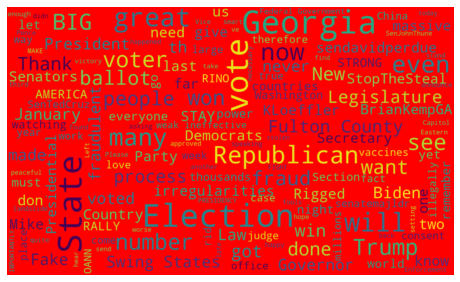

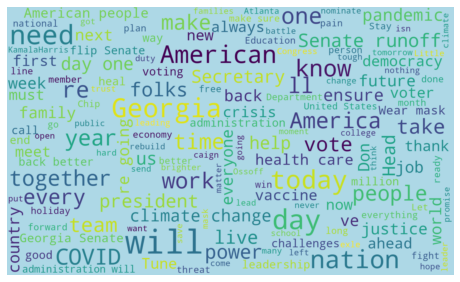

In [ ]:
################# Wordclouds Prior to Vectorization ###############################
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#prior to vectorization 
#Trump
words = (', '.join(df_t['clean_tweet']))
wordcloud_before = WordCloud(background_color='red', width=1500, height=900,
                     stopwords = None, max_words = 150,max_font_size=110).generate(words)
plt.figure(figsize=(8, 7))
plt.imshow(wordcloud_before, interpolation="bilinear")
plt.axis('off')
plt.show()
#Biden
words = (', '.join(df_b['clean_tweet']))
wordcloud_before = WordCloud(background_color='lightblue', width=1500, height=900,
                     stopwords = None, max_words = 150,max_font_size=110).generate(words)
plt.figure(figsize=(8, 7))
plt.imshow(wordcloud_before, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Remove na
df_t.dropna()
df_b.dropna()

,tweet,clean_tweet
0,Our nominees for the Justice Department will r...,Our nominees for the Justice Department will r...
1,"Today is a reminder, a painful one, that democ...",Today is a reminder a painful one that democ...
2,"Through war and strife, America has endured mu...",Through war and strife America has endured mu...
3,Our way is plain: It is the way of democracy —...,Our way is plain It is the way of democracy ...
4,America is so much better than what we’re seei...,America is so much better than what we re seei...
...,...,...
154,This team of world-class medical experts and p...,This team of world class medical experts and p...
155,I promise you this: I will spare no effort — o...,I promise you this I will spare no effort o...
156,The dreams of too many Americans have been def...,The dreams of too many Americans have been def...
157,"With COVID-19 cases rising across the nation, ...",With COVID cases rising across the nation ...


In [ ]:
#Add a column for author to each df
#Trump
df_t['author'] = 't'
print(df_t.head(1))
#
df_b['author'] = 'b'
df_b.head(1)

                                               tweet  ... author
0  I am asking for everyone at the U.S. Capitol t...  ...      t

[1 rows x 3 columns]


,tweet,clean_tweet,author
0,Our nominees for the Justice Department will r...,Our nominees for the Justice Department will r...,b


In [ ]:
#Merge dfs
df = df_t.append(df_b).reset_index()
df = df.drop('tweet',1)
df = df.drop('index',1)
df.tail()

,clean_tweet,author
273,This team of world class medical experts and p...,b
274,I promise you this I will spare no effort o...,b
275,The dreams of too many Americans have been def...,b
276,With COVID cases rising across the nation ...,b
277,I know times are tough the challenges are dau...,b


In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.feature_extraction import text 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#vectorize - create model
stop_words_1 = text.ENGLISH_STOP_WORDS.union()

TV = TfidfVectorizer(analyzer = 'word',
                     stop_words = "english",
                     #stop_words=stop_words_1,
                     max_features =125,
                     min_df = 2,
                     )

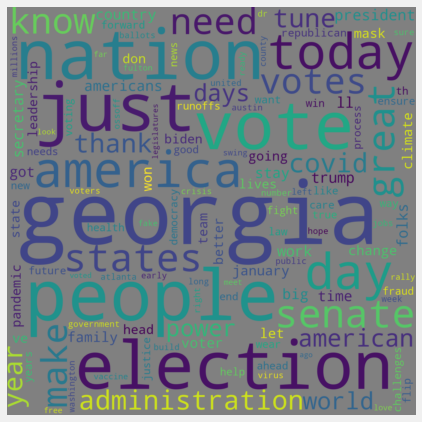

In [ ]:
# create df to count word_freq for Tfidf
words_t = TV.fit_transform(df.clean_tweet)
sum_words_t = words_t.sum(axis=0)
words_freq_t = [(word, sum_words_t[0, idx]) for word, idx in TV.vocabulary_.items()]
words_freq_t = sorted(words_freq_t, key = lambda x: x[1], reverse = True)

# Wordcloud after merging and TV vectorization
wordcloud_after_t = WordCloud(background_color = 'grey', width = 1500, height = 1500,
                      max_words = 125).generate_from_frequencies(dict(words_freq_t))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_after_t, interpolation="bilinear")
plt.axis('off')
plt.show()

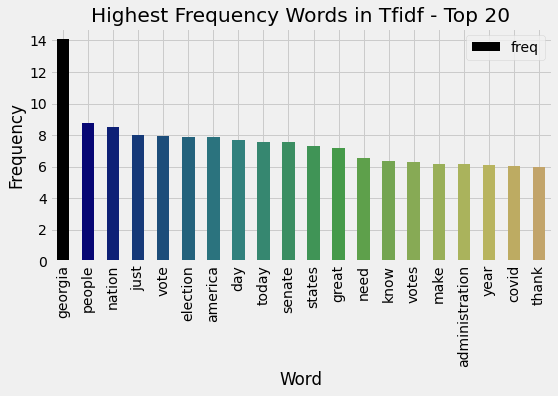

In [ ]:
#Bar graph word frequency TV
#create df of frequency TV
frequency_t = pd.DataFrame(words_freq_t, columns=['word', 'freq'])

#create bar graph TV
plt.style.use('fivethirtyeight')
color = plt.cm.gist_earth(np.linspace(0, 1, 25))
frequency_t.head(20).plot(x='word', y='freq', kind='bar', figsize=(8, 4), color = color)
plt.title("Highest Frequency Words in Tfidf - Top 20")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Naive Bayes Score with cv =10
TV_nb = Pipeline([('vect', TV)
                           ,('nb', MultinomialNB())])
nb_scores = cross_val_score(TV_nb,  df.clean_tweet, df.author, cv=10)
nb_avg=sum(nb_scores)/len(nb_scores)
print('Naive Bayes score:',nb_avg)

#Random Forest Score with cv =10
TV_rf = Pipeline([('vect', TV)
                           ,('rf', RandomForestClassifier())])
rf_scores = cross_val_score(TV_rf,  df.clean_tweet, df.author, cv=10)
rf_avg=sum(rf_scores)/len(rf_scores)
print('Random Forest score:',rf_avg)

#XGBoost Score with cv =10
import xgboost as xgb
TV_xgb = Pipeline([('vect', TV)
                           ,('xgb', xgb.XGBClassifier())])
xgb_scores = cross_val_score(TV_xgb,  df.clean_tweet, df.author, cv=10)
xgb_avg=sum(xgb_scores)/len(xgb_scores)
print('XGBoost Score:',xgb_avg)

#Linear SVM Score with cv =10
from sklearn import svm
TV_svm = Pipeline([('vect', TV)
                           ,('svm', svm.LinearSVC())])
svm_scores = cross_val_score(TV_svm ,  df.clean_tweet, df.author, cv=10)
svm_avg=sum(svm_scores)/len(svm_scores)
print('SVM Score:',svm_avg)

Naive Bayes score: 0.7813492063492062
Random Forest score: 0.8637566137566136
XGBoost Score: 0.8206349206349206
SVM Score: 0.8957671957671959


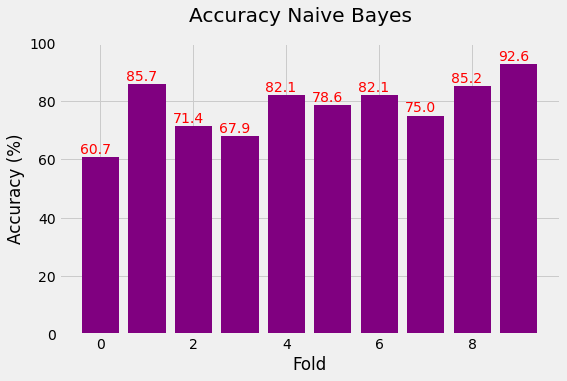

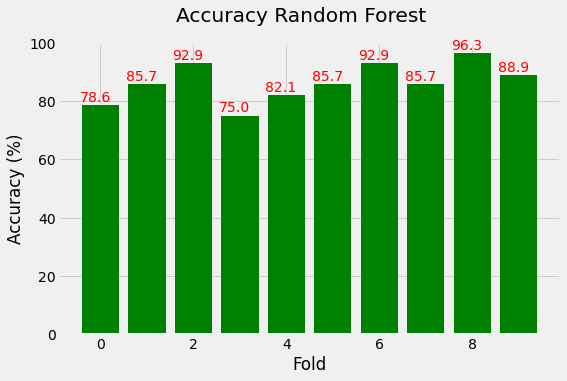

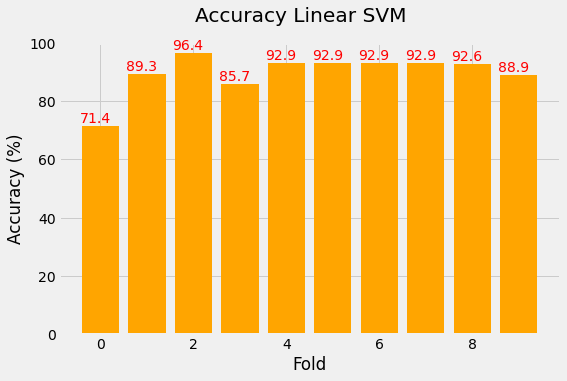

In [ ]:
##### Plot accuracies from cross validation for NB #####
fig, ax = plt.subplots(figsize=(8, 5))
#Create scores and folds 
acc_scores_nb = [round(a * 100, 1) for a in nb_scores]
x1 = np.arange(len(acc_scores_nb))
#Create bar chart
ax.bar(x1, acc_scores_nb, color = 'purple')
for i, v in enumerate(list(zip(acc_scores_nb))):
    ax.text(i - .45 , v[0] + 1.25, str(v[0]), color = "red")    
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Fold')
ax.set_ylim([0, 100])
#raise title
plt.suptitle('Accuracy Naive Bayes', fontsize = 'x-large' )
plt.show()

##### Plot accuracies from cross validation for RF #####
fig, ax = plt.subplots(figsize=(8, 5))
#Create scores and folds 
acc_scores_rf = [round(a * 100, 1) for a in rf_scores]
x1 = np.arange(len(acc_scores_rf))
#Create bar chart
ax.bar(x1, acc_scores_rf, color = 'green')
for i, v in enumerate(list(zip(acc_scores_rf))):
    ax.text(i - .45 , v[0] + 1.25, str(v[0]), color = "red")    
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Fold')
ax.set_ylim([0, 100])
#raise title
plt.suptitle('Accuracy Random Forest', fontsize = 'x-large' )
plt.show()

##### Plot accuracies from cross validation for Linear SVM #####
fig, ax = plt.subplots(figsize=(8, 5))
#Create scores and folds 
acc_scores_svm = [round(a * 100, 1) for a in svm_scores]
x1 = np.arange(len(acc_scores_svm))
#Create bar chart
ax.bar(x1, acc_scores_svm, color = 'orange')
for i, v in enumerate(list(zip(acc_scores_svm))):
    ax.text(i - .45 , v[0] + 1.25, str(v[0]), color = "red")    
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Fold')
ax.set_ylim([0, 100])
#raise title
plt.suptitle('Accuracy Linear SVM', fontsize = 'x-large' )
plt.show()

In [ ]:
########### Create DTM, DF and Train/Test sets #############
# fit vocabulary in training documents and transform the training documents into vectors
DTM = TV.fit_transform(df.clean_tweet)
## get col names
ColNames=TV.get_feature_names()
print(ColNames)

#shape of count vector
DTM.shape #(Before:50 rows, 662 tokens : After: 50 rows,125 tokens)

## convert DTM to DF 
DF = pd.DataFrame(DTM.toarray(),columns=ColNames)

#Insert Labels
DF.insert(0, 'author', df.author)
#check type of object
DF.head()

####create training and testing splits
Tr, Test = train_test_split(DF, test_size=0.2, random_state=24)

## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET

## Save labels
Test_l= Test["author"]
#print(Test_l)

## remove labels
Test_nl = Test.drop(["author"], axis=1)
#print(Test_nl)

#Create a file for Train labels 
Tr_l=  Tr["author"]
#print(Tr_l)

#remove labels from Train 
Tr_nl = Tr.drop(["author"], axis=1)
#print(Tr_nl)

#check
#print(Tr_nl.shape, Test_nl.shape)

# Check how many training examples in each category
# this is important to see whether the data set is balanced or skewed
unique, counts = np.unique(Tr_l, return_counts=True)
print(np.asarray((unique, counts)))

In [ ]:
#Use Linear SVM to make a prediction, confusion matrix and classification report
# initialize the Linear SVM model 
svm_lin = svm.LinearSVC()
# use the training data to train the SVM model 
svm_lin.fit(Tr_nl,Tr_l)
# Training score
SVM_Tr_score = svm_lin.score(Tr_nl,Tr_l)
print('Train Score:', SVM_Tr_score)

# test the classifier on the test data set, print accuracy score
test_score = svm_lin.score(Test_nl, Test_l)#
print('Test Score:',test_score)

#prediction
pred = svm_lin.predict(Test_nl)

#confusion_Matrix _CV
cm = confusion_matrix(Test_l, pred)

#Classification Report
cr = (classification_report(Test_l, pred))
print(cr)


Train Score: 0.9819819819819819
Test Score: 0.8928571428571429
              precision    recall  f1-score   support

           b       0.94      0.89      0.91        35
           t       0.83      0.90      0.86        21

    accuracy                           0.89        56
   macro avg       0.88      0.90      0.89        56
weighted avg       0.90      0.89      0.89        56



[Text(0, 0.5, 'Biden'), Text(0, 1.5, 'Trump')]

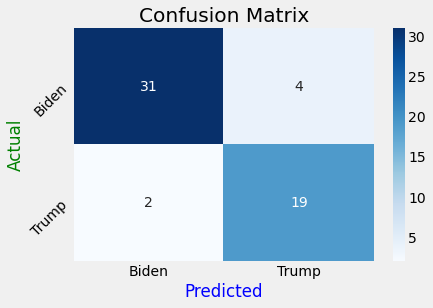

In [ ]:
#Confusion Matrix for Tweets
import seaborn as sns

# Plot confusion matrix 
ax= plt.subplot()
cm = sns.heatmap(cm, annot=True, ax = ax, cmap='Blues') 
# labels, title and ticks
ax.set_xlabel('Predicted', color = "Blue")
ax.set_ylabel('Actual', color = "Green") 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Biden','Trump']) 
ax.yaxis.set_ticklabels(['Biden','Trump']) 
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')